# Loan Application Status Prediction

## <b> Problem Statement:</b>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### <b>Independent Variables:</b>

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

<b>You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.</b> 

<b>Note: The link of the dataset is below. 

Downlaod Files:</b>

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Statistical Analysis

### Data Integrity Check

In [5]:
df.duplicated().sum() # Check for duplicated entry exit in dataset 

0

#### Observation:
Dataset doesnot contain Any duplicate entry.

### Datatype Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Observation:
    - We have 614 rows with 13 columns including target variable.
    - 'Loan_Status'(Target Variable) with object datatype is categorical variable.
    - Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
    - We have 3 types of datatypes: float64(4), int64(1), object(8)

### Missing value check 

<AxesSubplot: >

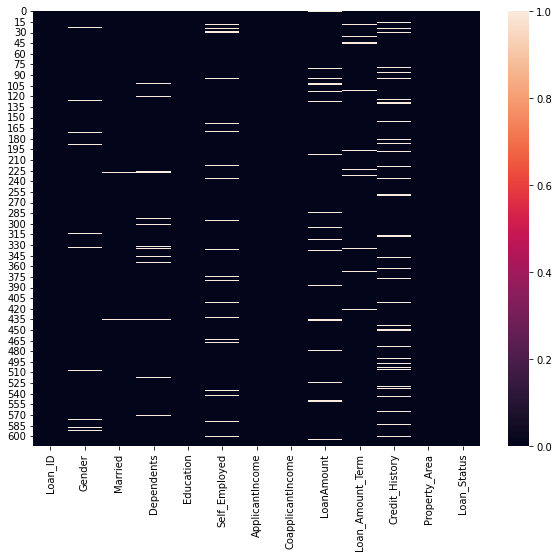

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


### Observation
    - 7 out 13 columns contains missing value.
    -We will use  mean amd mode to replace with NaN values.
    


### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [9]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


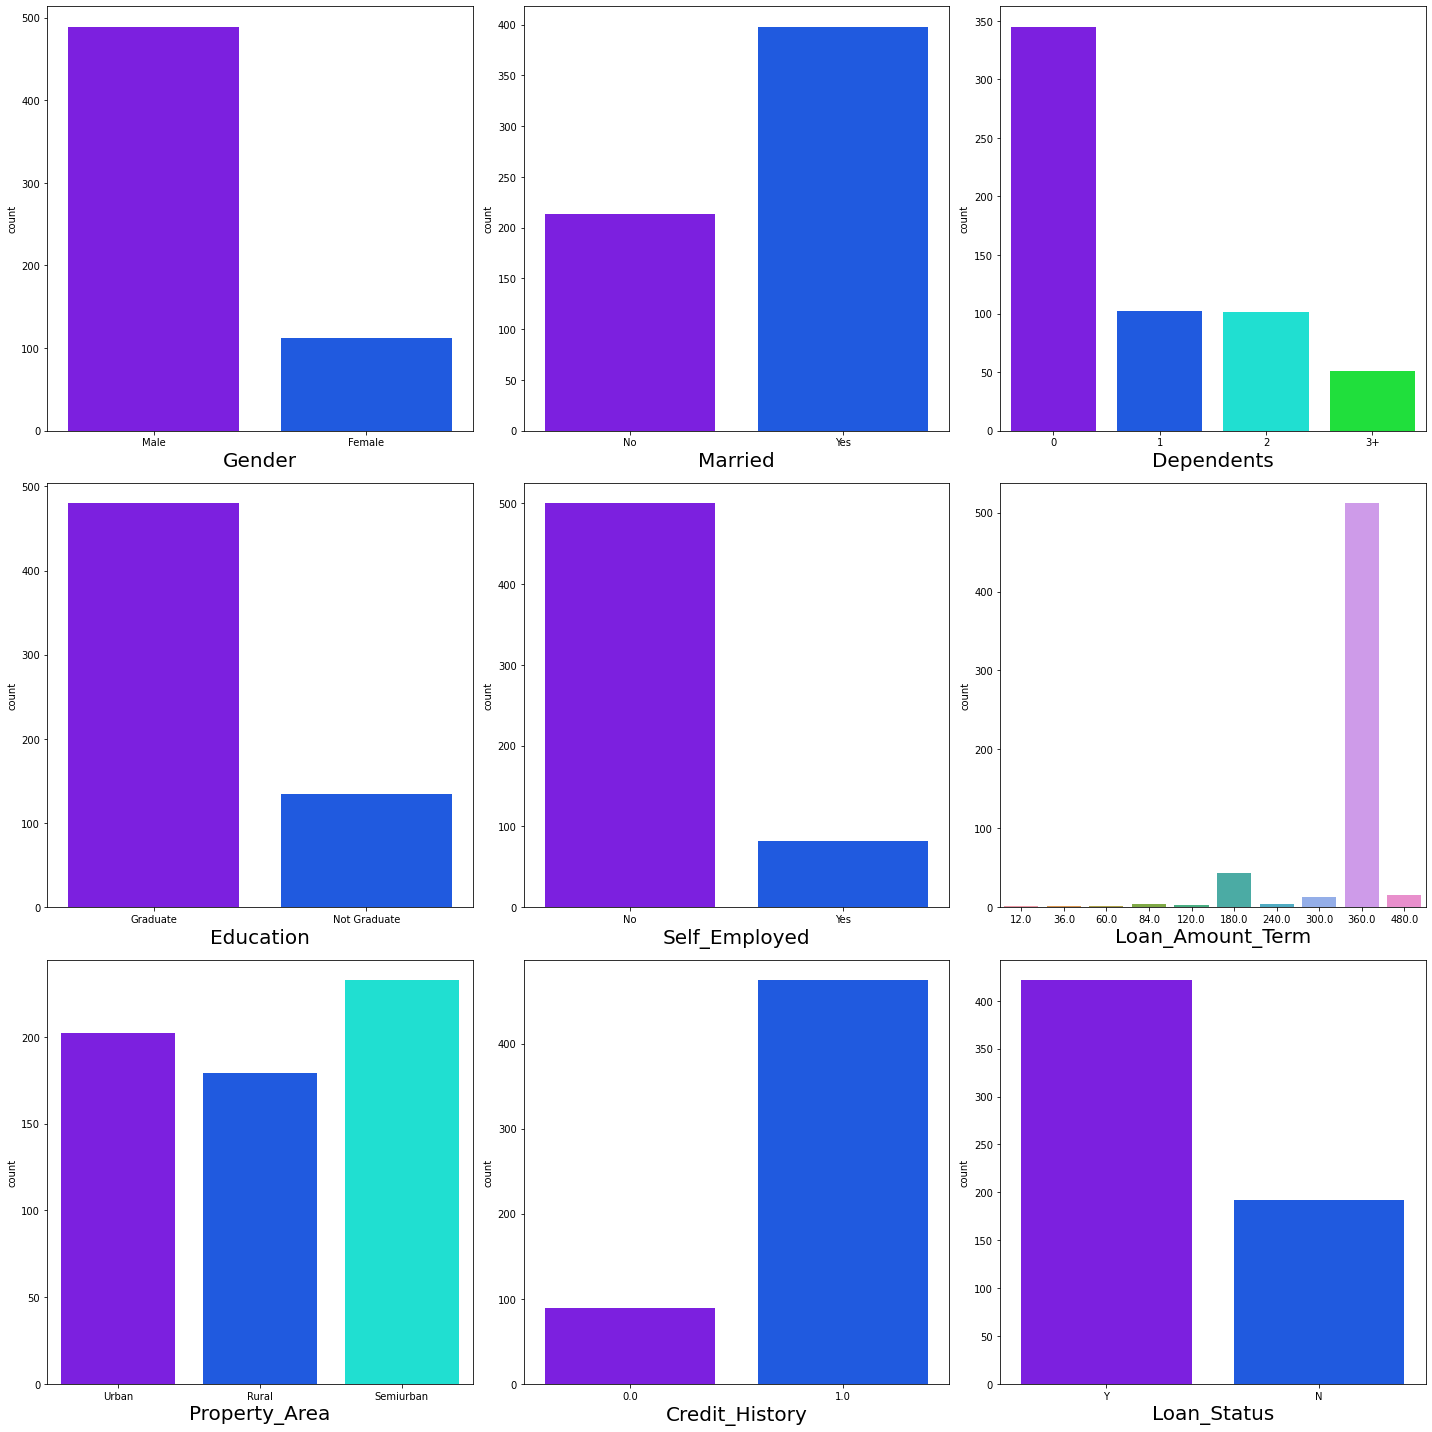

In [10]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Observation

     - 80 % applicants are Male. We can Explore loan amount for each gender applied & evaluate whether same basis loan is approved for each gender or not?
     - Only 20% applicants are self employed. 
     -  75% of loan applicants are graduates & ~70% are married 
     - ~60% of the applicants have no dependents.
     - Most of applicants are from Semi Urban areas, followed by Urban and Rural areas.
     - 80% people previously have credit history. 
     - 70 % applicant gets loan approved.
    
    Impute categoical variable with mode in the category. 
    For numerical variable we have option of mean and median. 
    If Outliers are to strech then we will impute with median.  
.

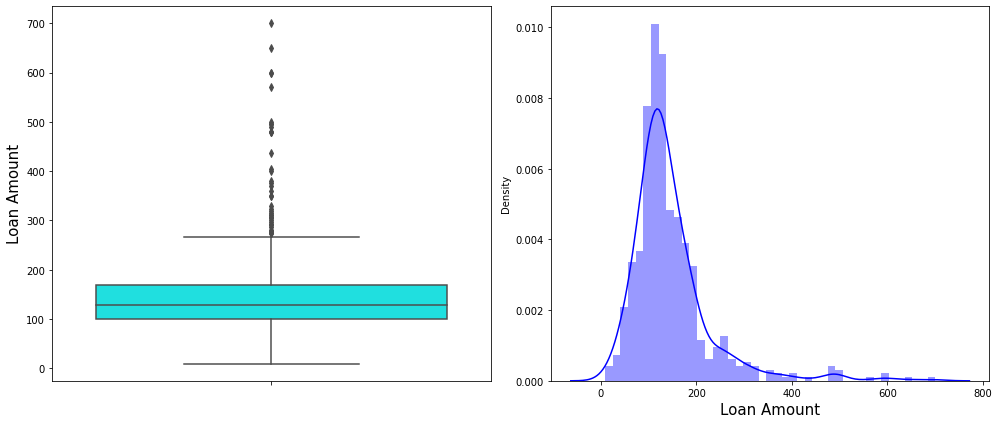

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [12]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


#### Observation -
- The mean is greater than median loan amount.
- Clearly we can see outliers in boxplot

As extreme outliers are present in feature a we are going to impute missing values in <u>loan amount  with median.

### Imputation of Missing values

In [13]:
# Imputate Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

### Missing Value Check After Imputation

In [14]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


#### Observation:
No Missing Value is Present.


### Statistical Matrix

<AxesSubplot: >

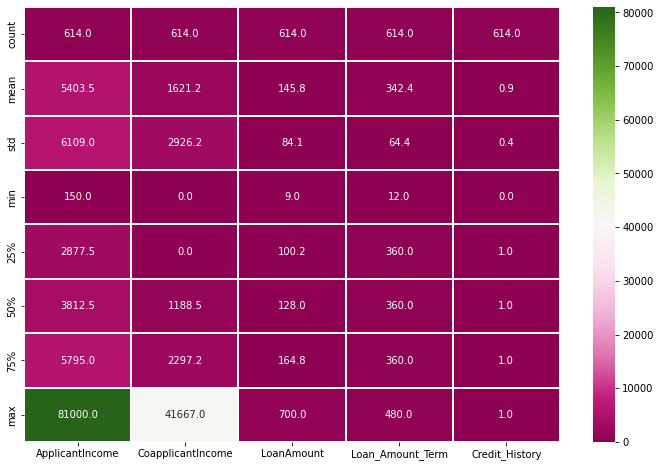

In [15]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Observation:
- Income Std deviation value is >median. So data is spread and skewed.
- Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
- Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.

### Target Variable

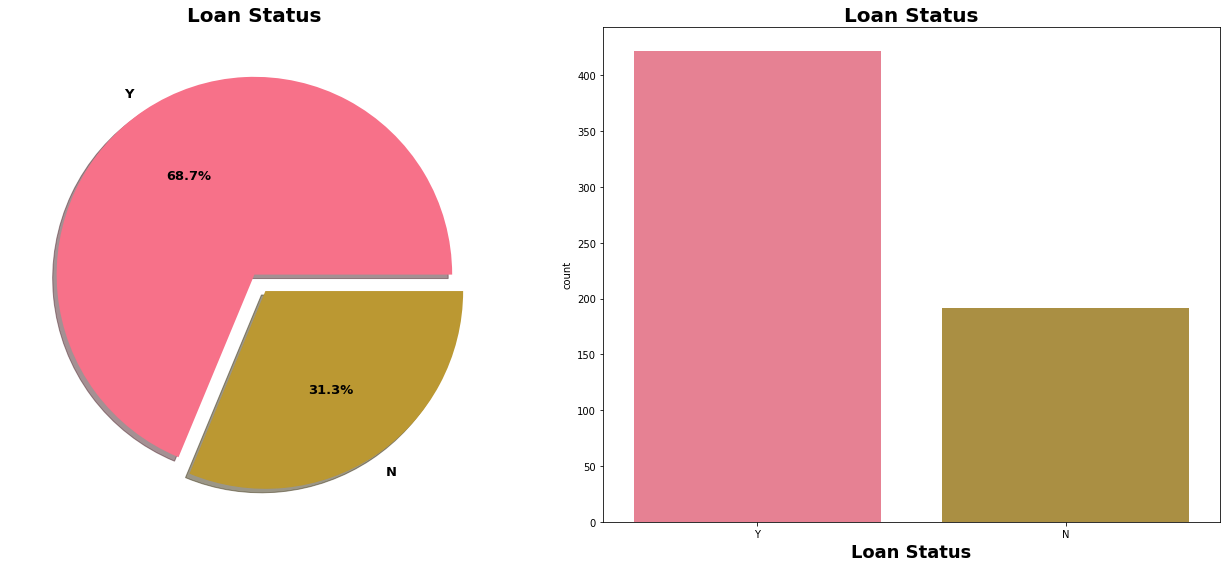

In [17]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

#### Observation :
- 68.7% Applicants will get loan Approval.
- Dataset is imbalanced in nature.


### Gender Vs Loan Status

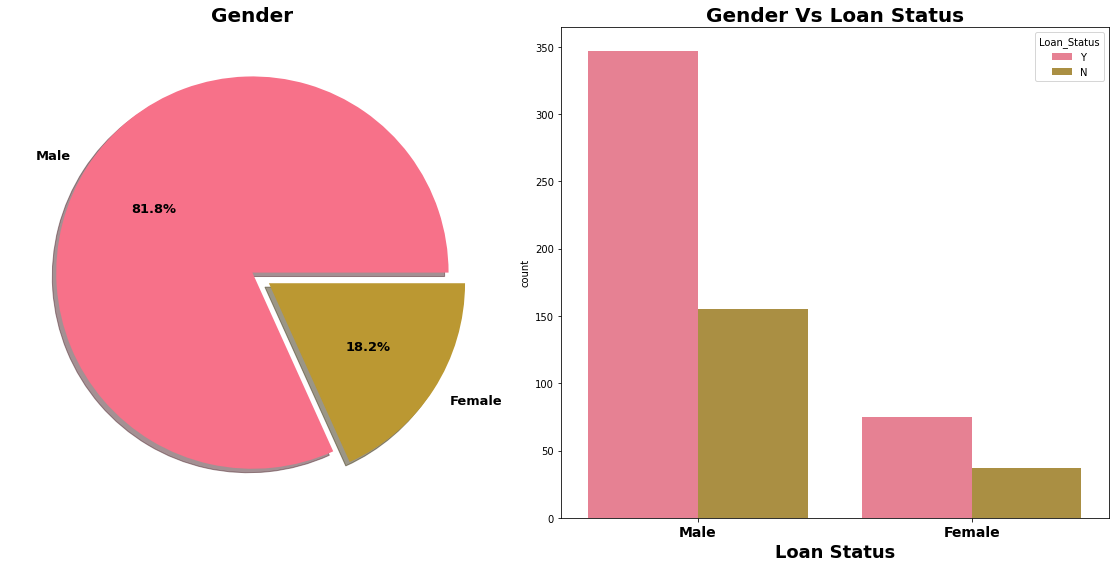

In [18]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [19]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


#### Observation :
- 81.8% Applicants are male.
- 65 % Applicant from each gender gets loan approval. No Discrimation on name of Gender done.

### Married Vs Loan Status

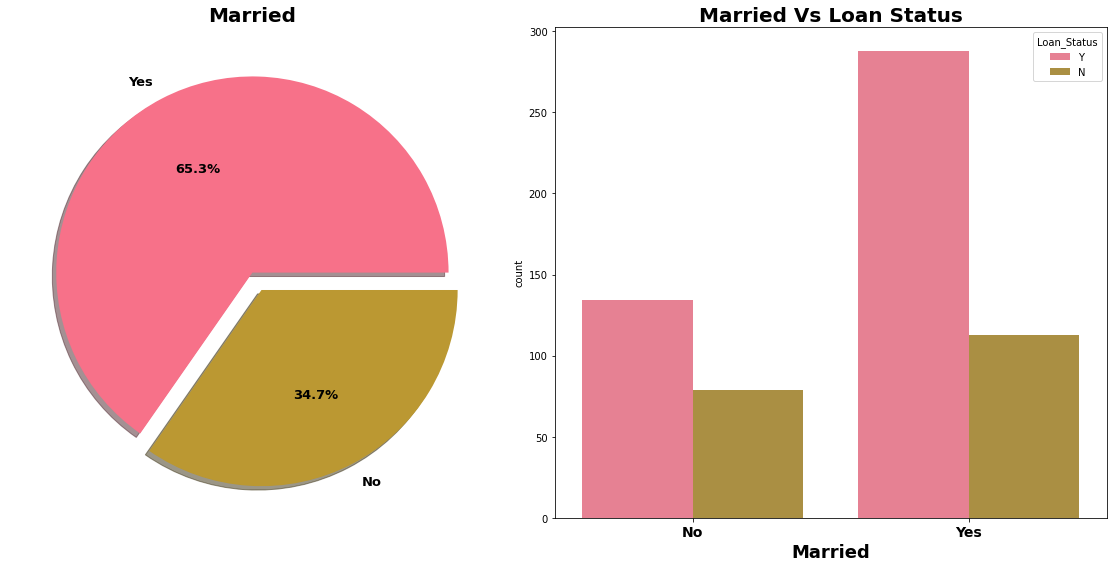

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [21]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

#### Observation:
- 65.3 % loan applicants are married.  Married people have more possibility of getting loan approval.
- Unmarried Women are  getting more loan approvals compare to married women. 
- Married Men have more  loan approval.    


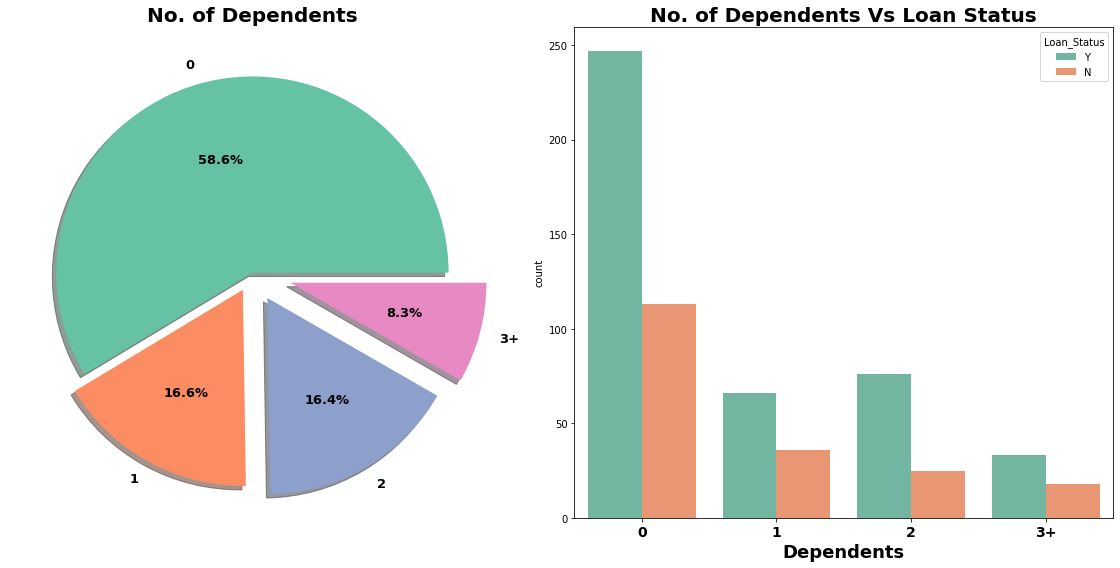

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [24]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Observation:
- 58.6% Applicants have no dependents on them.
- 33% Applicants have either 1 or 2 dependents.
- Female with having zero dependents have more chances to get loan approval compare to Females with dependents.
- For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Education Vs Loan status

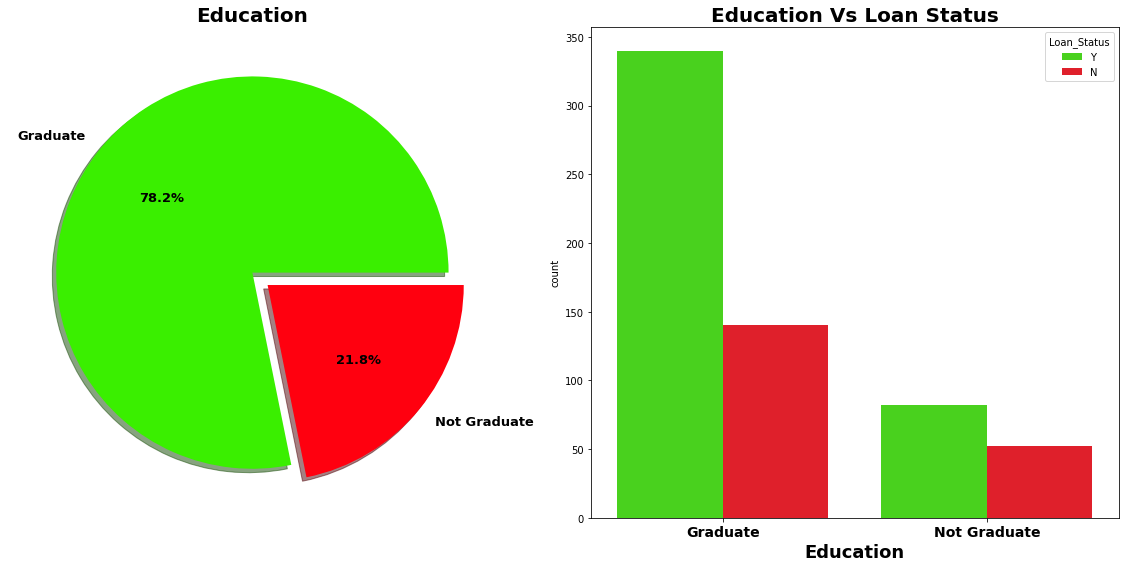

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [27]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Comment:
- Graduate applicants are more likely to get loan approval irrespective gender.

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encoding categorical data

In [29]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [30]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [31]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

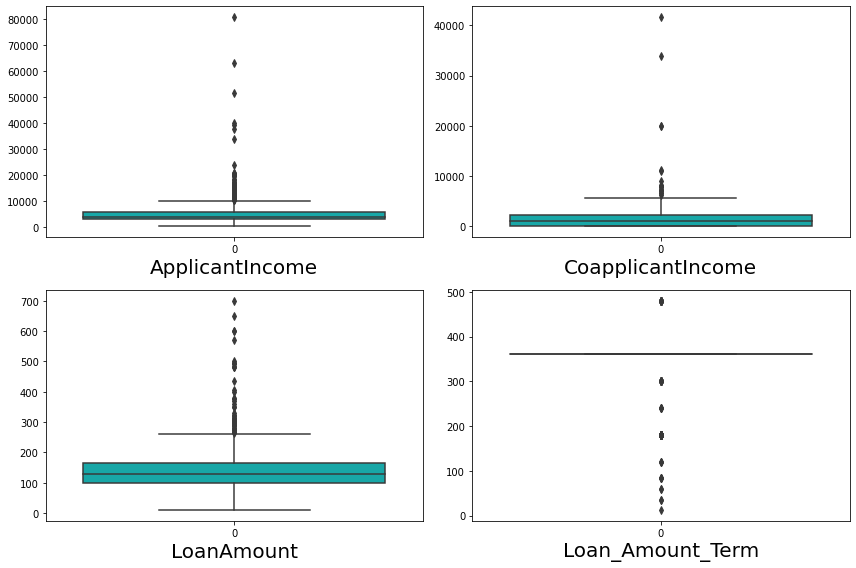

In [32]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

In [33]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [34]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [35]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # Copy of the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


##### Data Loss

<b><em> We are losing 6.02 % of data and which Acceptable.</em></b>

## 2.  Skewness of features

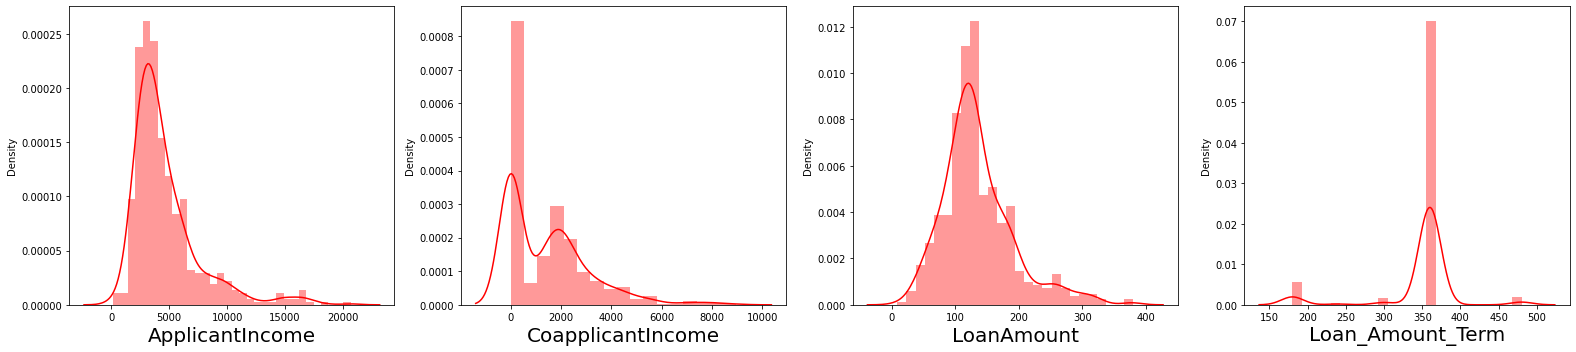

In [37]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [38]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

#### Observation :
- 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.>
- Other features are categorical in nature so skewness can be ignored
- We will yeo-johnson transformation method.

In [39]:
# Removing skewness with yeo-johnson  method 
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [40]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


Check skewness with yeo-johnson method

In [41]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Numerical variable skewness is within permissible limit.

## Correlation 

In [42]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


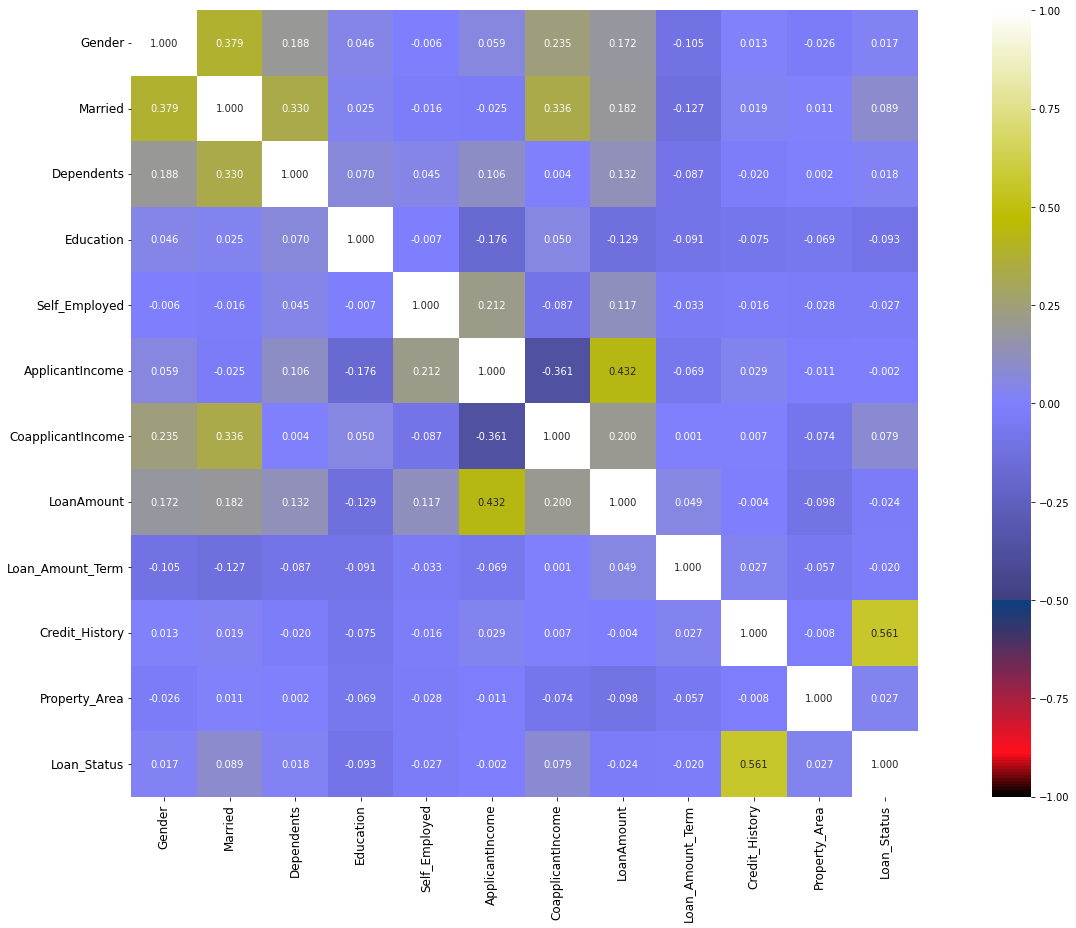

In [43]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

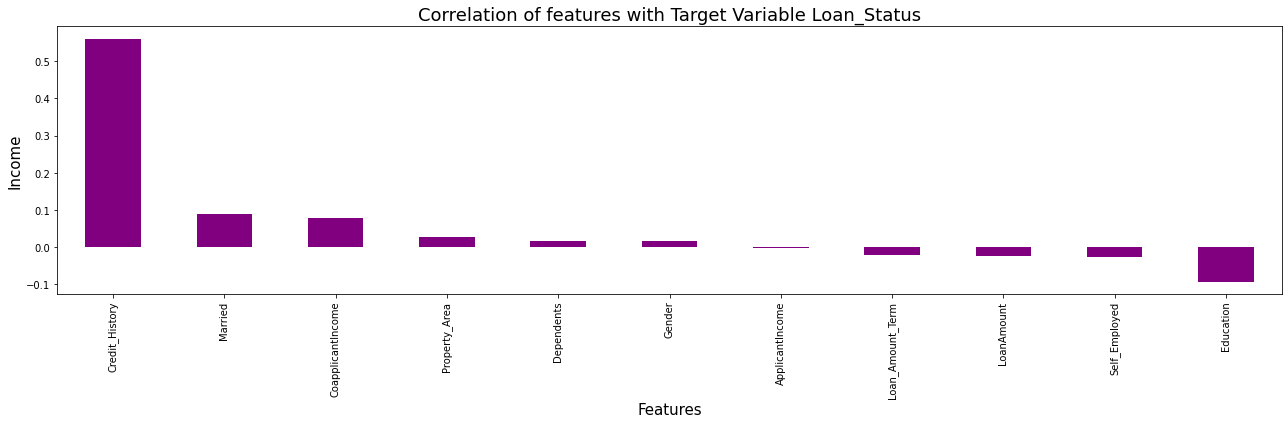

In [44]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

#### Observation:
- Most of feature are poorly or moderately correlated with target variable expect Credit History.
-  Maximum correlation of 0.561 exist between Credit History and Loan status.

 ## Check for Multicollinearity between features using variance_inflation_factor

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


All features VIF is < 10. 



## Balancing target feature

In [46]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Target variable data is Imbalanced in nature we will need to balance target variable.

### Balancing using SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
# Split data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [49]:
# using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [50]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Class imbalanced problem is resolved and now all the categories have same data ensuring that the ML model does not get biased towards one category.

## Standard Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.2)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (636, 11)
Training target vector size: (636,)
Test feature matrix size: (160, 11)
Test target vector size: (160,)


In [54]:
# required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,f1_score

lr=LogisticRegression()  # Define instance for logisticregression

# Find the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(X_scale, Y, random_state=i, test_size=.2)    
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
3,720,75.000000,75.000,0.000000
0,98,75.628931,75.625,0.003931
1,378,75.628931,75.625,0.003931
2,708,75.628931,75.625,0.003931
4,764,75.628931,75.625,0.003931


Observations:

From the above table, as multple random states give same training and testing accuarcy scores, taking one of this from the below code

In [55]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

720

In [56]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(X_scale, Y,test_size=0.2,random_state=BRS)

In [57]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.75


In [58]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        68
           1       0.76      0.83      0.79        92

    accuracy                           0.75       160
   macro avg       0.75      0.74      0.74       160
weighted avg       0.75      0.75      0.75       160



In [59]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[44 24]
 [16 76]]


# Cross Validation for Logistic Regression

In [60]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,X_scale, Y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
7,9,74.896436,75.0,0.001036
8,10,75.261076,75.0,0.002611
6,8,74.646465,75.0,0.003535
5,7,74.499301,75.0,0.005007
3,5,73.876572,75.0,0.011234
4,6,73.745918,75.0,0.012541
2,4,73.618090,75.0,0.013819
1,3,72.619757,75.0,0.023802
0,2,70.979899,75.0,0.040201


Observations:

Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=8 from the above table

In [61]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

9

In [62]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,X_scale, Y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 74.89643627284076 
The accuracy score is: 75.0
Difference is: 0.0010356372715923934


# Other Classification Algorithms

In [63]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier


# Defining Voting Classifier Models
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],X_scale, Y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
76.875
Confusion Matrix:
[[37 31]
 [ 6 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.54      0.67        68
           1       0.74      0.93      0.82        92

    accuracy                           0.77       160
   macro avg       0.80      0.74      0.74       160
weighted avg       0.79      0.77      0.76       160

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
68.75
Confusion Matrix:
[[52 16]
 [34 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.68        68
           1       0.78      0.63      0.70        92

    accuracy                           0.69       160
   macro avg       0.69      0.70      0.69       160
weighted avg       0.71      0.69      0.69       160

------------------------------------------------------------
Model

,Model,Model Score,Cross Validation Score,Difference
0,LogisticRegression(),75.000,74.896436,0.001036
4,SGDClassifier(),71.875,71.246170,0.006288
6,RandomForestClassifier(),81.875,83.949041,0.020740
5,SVC(),78.125,75.645500,0.024795
1,GaussianNB(),76.875,74.263704,0.026113
9,AdaBoostClassifier(),79.375,75.276643,0.040984
3,KNeighborsClassifier(),70.625,75.008512,0.043835
10,XGBClassifier(),76.875,81.558563,0.046836
8,GradientBoostingClassifier(),81.875,76.913801,0.049612
7,ExtraTreesClassifier(),76.875,83.313472,0.064385


## Observations:

Based on the comparison between model score and cross validation scores for multiple models, I have considered **"RandomForestClassifier()"** is the best model due to high model score

I will check with Cross validation score and check for **RandomForestClassifier()**

# CrossValidation :

In [64]:
from sklearn.model_selection import cross_val_score


model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier(),
        VotingClassifier(estimators=estimator,voting="soft")]

for m in model:
    score = cross_val_score(m,X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.68125    0.71698113 0.76100629 0.78616352 0.74842767]
Mean Score : 0.7387657232704403
Std deviation : 0.03637904400024474




Cross Validation Score SVC() :

Score : [0.71875    0.72327044 0.78616352 0.77987421 0.74842767]
Mean Score : 0.7512971698113209
Std deviation : 0.02787601049570404




Cross Validation Score GaussianNB() :

Score : [0.68125    0.71698113 0.79245283 0.77987421 0.73584906]
Mean Score : 0.7412814465408805
Std deviation : 0.040820835144076806




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7125     0.70440252 0.78616352 0.81132075 0.70440252]
Mean Score : 0.7437578616352201
Std deviation : 0.045689659598912205




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.71875    0.67924528 0.72327044 0.77987421 0.68553459]
Mean Score : 0.7173349056603773
Std deviation : 0.03580636111947172




Cross Validation Score RandomForestClassifier() :

Score : [0.75625    0.786163

## Observations:

Based on the comparison between model score and cross validation scores for multiple models, I have considered **"RandomForestClassifier()"** is the best model.

Hyper parameter tuning will be peformed for **RandomForestClassifier()** based on the Cross validation score aswell".

# Hyper Parameter Tuning

In [65]:
# Hyper parameter tuning on RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

parameters = {  'bootstrap': [True], 
             'max_depth': [5,50], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5,10]
            }

In [66]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=10,n_jobs=-1)  # Defining instance for GridSearchCV

In [67]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 50], 'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10]})

In [68]:
GCV.best_params_   # printing the best parameters

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 10}

In [69]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=RandomForestClassifier(bootstrap=GCV.best_params_['bootstrap'],criterion=GCV.best_params_['criterion'],
                                 max_depth=GCV.best_params_['max_depth'],max_features=GCV.best_params_['max_features'],
                                 n_estimators=GCV.best_params_['n_estimators'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

76.875
[[58 10]
 [27 65]]
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        68
           1       0.87      0.71      0.78        92

    accuracy                           0.77       160
   macro avg       0.77      0.78      0.77       160
weighted avg       0.79      0.77      0.77       160



In [70]:
score=cross_val_score(ht_model,X_scale, Y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 79.92566110543639 
The accuracy score is: 76.875
Difference is: -0.030506611054363808


## Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is -0.05

Model with default parameters: The difference between Cross Validation Score and model score is 0.006

As difference is almost same with defautl parameters We will consider  **RandomForestClassifier** model with default parameters

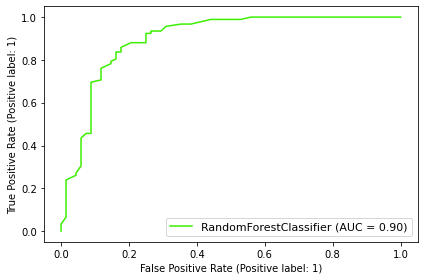

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8232097186700766


In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
Final_model = models[5][1]
disp = plot_roc_curve(Final_model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Final Model

In [72]:
#models selected ===RandomForestClassifier()
print("models selected ===",models[5][1])

x_predict = list(Final_model.predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

models selected === RandomForestClassifier()


,0
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


# Saving model

In [73]:
print("Model Saved--", Final_model)
import pickle
file = 'Loan_Status_Final'
save = pickle.dump(Final_model,open('Loan_Status_Final.pkl','wb'))

Model Saved-- RandomForestClassifier()


# Conclusion-Prediction Loan Status

In [74]:
pickled_LoanStatus_predict = pickle.load(open('Loan_Status_Final.pkl','rb'))
result=pickled_LoanStatus_predict.score(x_test,y_test)
print(result)

LoanStatus_Predicted=pickled_LoanStatus_predict.predict(x_test)
df_predicted = pd.DataFrame(LoanStatus_Predicted, columns =['LoanStatus_Predicted'])
print("\nLoan Status Predicted list based on Test data provided: ")
display(df_predicted)

0.81875

Loan Status Predicted list based on Test data provided: 


,LoanStatus_Predicted
0,0
1,0
2,0
3,1
4,0
...,...
155,1
156,1
157,1
158,1
